In [11]:
import pandas as pd
from matplotlib import pyplot as plt

In [112]:
benefits = pd.read_csv("../data/BenefitsCostSharing.csv")

In [68]:
def eda(dataframe):
    print "missing values \n", dataframe.isnull().sum()
    print "dataframe index \n", dataframe.index
    print "dataframe types \n", dataframe.dtypes
    print "dataframe shape \n", dataframe.shape
    print "dataframe describe \n", dataframe.describe()
    for item in dataframe:
        print item
        print dataframe[item].nunique()

eda(benefits)

missing values 
BenefitName                  0
BusinessYear                 0
CoinsInnTier1          1113847
CoinsInnTier2          4571587
CoinsOutofNet          1113847
CopayInnTier1          1113847
CopayInnTier2          4571587
CopayOutofNet          1113849
EHBVarReason           3020737
Exclusions             4572247
Explanation            4075700
ImportDate                   0
IsCovered               215980
IsEHB                  1817362
IsExclFromInnMOOP       983986
IsExclFromOonMOOP       982626
IsStateMandate         4250463
IsSubjToDedTier1       2465877
IsSubjToDedTier2       2466054
IssuerId                     0
IssuerId2                    0
LimitQty               4360725
LimitUnit              4360539
MinimumStay            5031681
PlanId                       0
QuantLimitOnSvc        3264532
RowNumber                    0
SourceName                   0
StandardComponentId          0
StateCode                    0
StateCode2                   0
VersionNum             

In [113]:
benefits.fillna(0, inplace = True)
benefits.head()

,BenefitName,BusinessYear,CoinsInnTier1,CoinsInnTier2,CoinsOutofNet,CopayInnTier1,CopayInnTier2,CopayOutofNet,EHBVarReason,Exclusions,...,LimitUnit,MinimumStay,PlanId,QuantLimitOnSvc,RowNumber,SourceName,StandardComponentId,StateCode,StateCode2,VersionNum
0,Routine Dental Services (Adult),2014,20%,0,20%,No Charge,0,No Charge,Above EHB,0,...,Dollars per Year,0.0,21989AK0010001-00,Yes,68,HIOS,21989AK0010001,AK,AK,6
1,Dental Check-Up for Children,2014,20%,0,20%,No Charge,0,No Charge,Substantially Equal,0,...,Visit(s) per 6 Months,0.0,21989AK0010001-00,Yes,104,HIOS,21989AK0010001,AK,AK,6
2,Basic Dental Care - Child,2014,40%,0,40%,No Charge,0,No Charge,Substantially Equal,0,...,0,0.0,21989AK0010001-00,0,110,HIOS,21989AK0010001,AK,AK,6
3,Orthodontia - Child,2014,50%,0,50%,No Charge,0,No Charge,Additional EHB Benefit,0,...,0,0.0,21989AK0010001-00,0,111,HIOS,21989AK0010001,AK,AK,6
4,Major Dental Care - Child,2014,50%,0,50%,No Charge,0,No Charge,Substantially Equal,0,...,0,0.0,21989AK0010001-00,0,112,HIOS,21989AK0010001,AK,AK,6


In [114]:
benefits['CoIn'] = float(benefits.CoinsInnTier1.str.findall(r'\d+'))

TypeError: cannot convert the series to <type 'float'>

In [126]:
benefits.columns
benefits.groupby(['StateCode','IssuerId'])['IssuerId'].count().xs('MO',axis = 0)

IssuerId
16049     6636
28214      200
29416      612
30494      108
30613    10182
32753    22260
32904      216
34762    16650
35853      108
39371      117
40807      324
44240    17356
44527    12493
48616       54
48786      238
53204       90
56603       36
59976      190
68265      144
68396      108
71691       45
74483     6607
81313      144
82905      108
86182       54
86779       36
94322       36
Name: IssuerId, dtype: int64

In [193]:
z = pd.DataFrame(benefits.groupby(['StateCode','IssuerId'])['IssuerId'].count())
# z.to_csv('../data/groupbystateissuerid.csv')

In [194]:
benefits.groupby(['StateCode','IssuerId'])['IssuerId'].count().to_frame(name = 'z').reset_index(inplace = True)
z.reset_index(level=0, inplace=True)


In [195]:
z.head()

,StateCode,IssuerId
IssuerId,,
21989,AK,207
38344,AK,16546
38536,AK,70
42507,AK,112
45858,AK,108


In [205]:
z_1 = pd.DataFrame(benefits.groupby(['StateCode'])['IssuerId'].count())

z_1.reset_index(inplace=True)
z_1.head()

,StateCode,IssuerId
0,AK,41320
1,AL,28417
2,AR,68064
3,AZ,221612
4,DE,31370


In [206]:
type(z_1)

pandas.core.frame.DataFrame

In [209]:
z_concat = z.merge(z_1, how = 'outer', left_on='StateCode', right_on='StateCode')

In [211]:
z_concat['Share'] = z_concat.IssuerId_x/z_concat.IssuerId_y
z_concat.head()

,StateCode,IssuerId_x,IssuerId_y,Share
0,AK,207,41320,0.005010
1,AK,16546,41320,0.400436
2,AK,70,41320,0.001694
3,AK,112,41320,0.002711
4,AK,108,41320,0.002614


In [242]:
a = z_concat[z_concat.Share>.10].groupby('StateCode').count()
a.to_csv('../data/numberofinscons.csv')
a.Share.head()

StateCode
AK    2
AL    3
AR    4
AZ    3
DE    3
Name: Share, dtype: int64

In [243]:
b = rates_1.IndividualRate.groupby(rates.StateCode).mean()
b.head()

StateCode
AK    631.788031
AL    250.278098
AR    212.122069
AZ    352.059498
DE    359.123401
Name: IndividualRate, dtype: float64

In [244]:
c = pd.concat([a.Share,b], axis = 1)
c.head()

,Share,IndividualRate
StateCode,,
AK,2,631.788031
AL,3,250.278098
AR,4,212.122069
AZ,3,352.059498
DE,3,359.123401


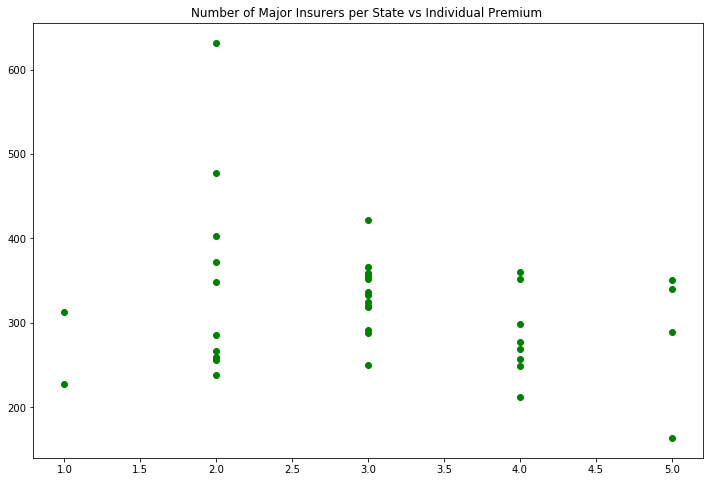

In [271]:
plt.figure(figsize = (12,8))
plt.scatter(c.Share, c.IndividualRate, color = 'green')
_ = plt.title("Number of Major Insurers per State vs Individual Premium ")
plt.show()

In [106]:
# benefits.fillna(0, inplace = True)

In [270]:
benefits.shape

(5048408, 32)

In [269]:
benefits.BenefitName.value_counts(sort=True)[:100].sum()

4952493L

In [266]:
bens.to_csv('../data/bens100.csv')

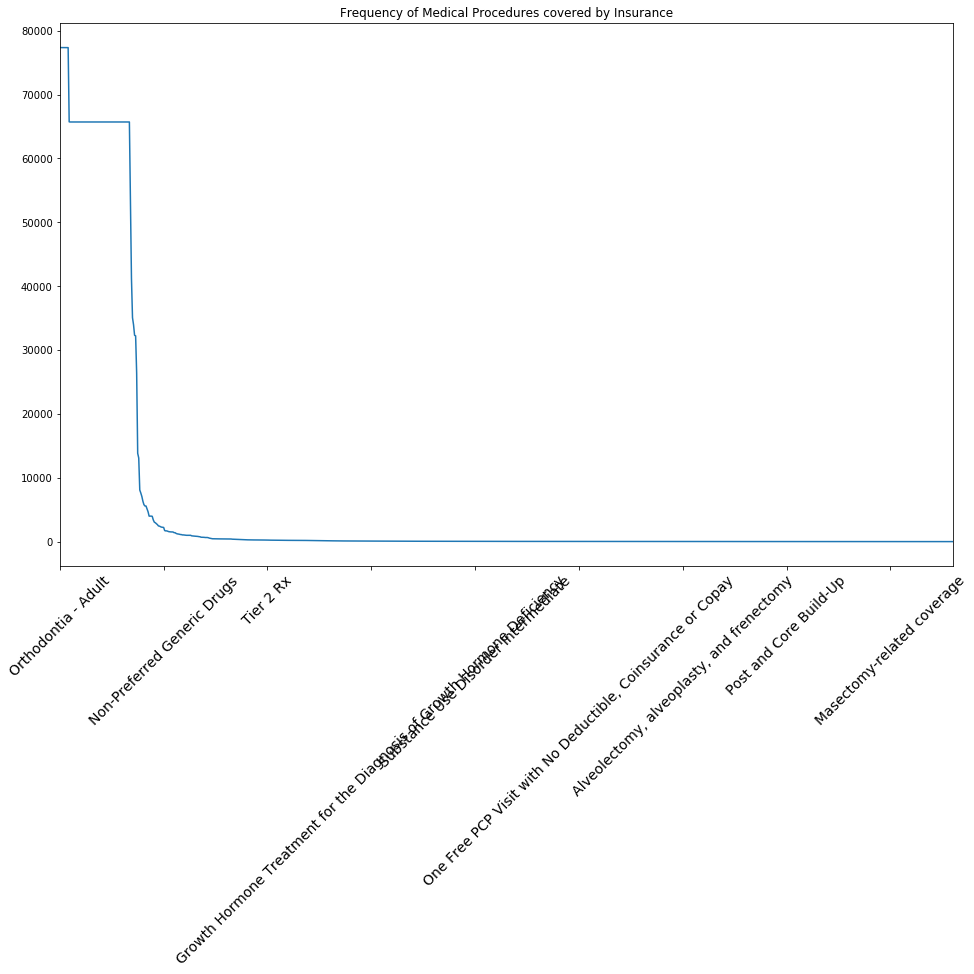

In [261]:
benefits.BenefitName.value_counts().plot(figsize = (16,10))
plt.xticks(rotation=45, fontsize = 14)
plt.title("Frequency of Medical Procedures covered by Insurance")
plt.show()

In [260]:
benefits.BenefitName.value_counts().head(10)

Orthodontia - Adult                                77377
Basic Dental Care - Adult                          77353
Major Dental Care - Child                          77353
Accidental Dental                                  77353
Dental Check-Up for Children                       77353
Basic Dental Care - Child                          77353
Routine Dental Services (Adult)                    77353
Major Dental Care - Adult                          77353
Orthodontia - Child                                77345
Treatment for Temporomandibular Joint Disorders    65724
Name: BenefitName, dtype: int64

In [18]:
len(benefits.BenefitName.unique())

861

In [19]:
benefits.BenefitName.value_counts()

Orthodontia - Adult                                                                                         77377
Basic Dental Care - Adult                                                                                   77353
Major Dental Care - Child                                                                                   77353
Accidental Dental                                                                                           77353
Dental Check-Up for Children                                                                                77353
Basic Dental Care - Child                                                                                   77353
Routine Dental Services (Adult)                                                                             77353
Major Dental Care - Adult                                                                                   77353
Orthodontia - Child                                                                     

In [21]:
rates = pd.read_csv('../data/Rate.csv')

In [272]:
rates.shape

(12694445, 24)

In [22]:
rates.head()

,BusinessYear,StateCode,IssuerId,SourceName,VersionNum,ImportDate,IssuerId2,FederalTIN,RateEffectiveDate,RateExpirationDate,...,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents,RowNumber
0,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,29.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14
1,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,36.95,NaN,73.9,107.61,107.61,107.61,144.56,144.56,144.56,14
2,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,36.95,NaN,73.9,107.61,107.61,107.61,144.56,144.56,144.56,15
3,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,32.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
4,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,32.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16


In [34]:
rates.groupby(rates.StateCode).IndividualRate.mean().head(4)

StateCode
AK     7024.934674
AL    12131.738408
AR    15069.197977
AZ     3976.503845
Name: IndividualRate, dtype: float64

In [37]:
rates.groupby([rates.StateCode, rates.BusinessYear]).IndividualRate.mean()

In [38]:
# export_.to_csv('../data/groupbystateindrates.csv')

In [46]:
rates_1 = rates[rates.IndividualRate < 9000]
rates_1.IndividualRate.value_counts().head(5)

0.00     682484
99.99     87941
99.00     36455
1.50      24660
18.49     15032
Name: IndividualRate, dtype: int64

In [ ]:
rates_1 = rates[rates.IndividualRate < 9000]
rates_1.IndividualRate.value_counts().head(5)

In [65]:
rates_1.columns

Index([u'BusinessYear', u'StateCode', u'IssuerId', u'SourceName',
       u'VersionNum', u'ImportDate', u'IssuerId2', u'FederalTIN',
       u'RateEffectiveDate', u'RateExpirationDate', u'PlanId', u'RatingAreaId',
       u'Tobacco', u'Age', u'IndividualRate', u'IndividualTobaccoRate',
       u'Couple', u'PrimarySubscriberAndOneDependent',
       u'PrimarySubscriberAndTwoDependents',
       u'PrimarySubscriberAndThreeOrMoreDependents', u'CoupleAndOneDependent',
       u'CoupleAndTwoDependents', u'CoupleAndThreeOrMoreDependents',
       u'RowNumber'],
      dtype='object')

In [74]:
rates_1[rates_1.CoupleAndTwoDependents.isnull() == False].head()

,BusinessYear,StateCode,IssuerId,SourceName,VersionNum,ImportDate,IssuerId2,FederalTIN,RateEffectiveDate,RateExpirationDate,...,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents,RowNumber
1,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,36.95,NaN,73.9,107.61,107.61,107.61,144.56,144.56,144.56,14
2,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,36.95,NaN,73.9,107.61,107.61,107.61,144.56,144.56,144.56,15
5,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,36.95,NaN,73.9,107.61,107.61,107.61,144.56,144.56,144.56,16
6,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,32.45,NaN,64.9,94.50,94.50,94.50,126.95,126.95,126.95,17
9,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,32.45,NaN,64.9,94.50,94.50,94.50,126.95,126.95,126.95,18


In [ ]:
rates_1.

In [86]:
l = rates_1.IndividualRate.groupby(rates_1.StateCode).mean()

In [87]:
l.to_csv('../data/meanindrate.csv')

# The mean Individual Rates for each state across 2014 - 2016

In [53]:
export_2 = rates_1.groupby([rates_1.StateCode, rates_1.BusinessYear]).IndividualRate.mean()

In [54]:
export_2.to_csv('../data/export_2.csv')

In [55]:
rates_1.IndividualTobaccoRate.unique()

array([     nan,   111.74,   193.59, ...,  1331.4 ,  1150.62,  1191.32])

In [56]:
rates_1.IndividualRate.count()

12621995

In [57]:
rates_1.IndividualTobaccoRate.count()

4932349

In [58]:
rates_1.shape

(12621995, 24)

In [276]:
d = pd.DataFrame(rates_1[rates_1.IndividualTobaccoRate.isnull() != True][['BusinessYear', 
                                                         'StateCode','IndividualRate', 
                                                         'IndividualTobaccoRate']].groupby('StateCode').sum())

d['SurCharge'] = d.IndividualTobaccoRate/d.IndividualRate
d

,BusinessYear,IndividualRate,IndividualTobaccoRate,SurCharge
StateCode,,,,
AK,13344876,4.651114e+06,4.997045e+06,1.074376
AL,53858502,1.016891e+07,1.134159e+07,1.115319
AR,45238608,9.572834e+06,1.130994e+07,1.181462
AZ,156540576,3.173432e+07,3.611266e+07,1.137969
DE,19744350,4.947674e+06,5.262465e+06,1.063624
FL,1376561546,3.134907e+08,3.684352e+08,1.175267
GA,222271678,4.692623e+07,5.742342e+07,1.223696
HI,1947456,3.705168e+05,4.439991e+05,1.198324
IA,152429832,2.988349e+07,3.842305e+07,1.285762


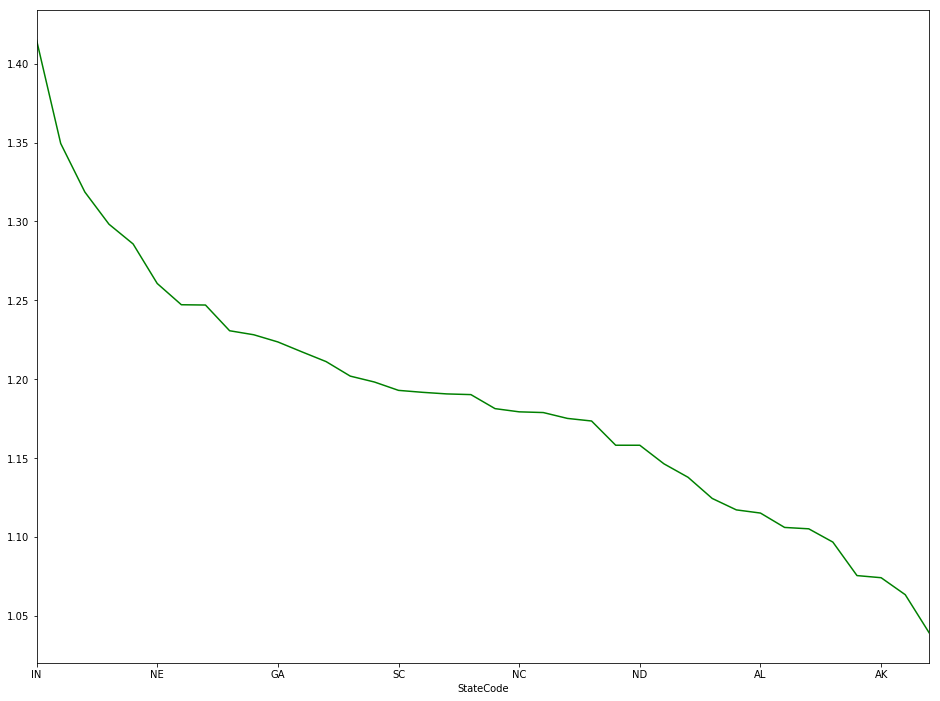

In [300]:
d['SurCharge'].sort_values(ascending = False).plot(figsize = (16,12), color = 'green')

plt.show()

In [71]:
len(rates_1.StateCode.unique())

39